# Algerian Forest Fire Dataset - Temperature Prediction

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

## Reading Dataset

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [5]:
#dropping unwanted rows
df.drop(index=[122,123], inplace=True)
df.reset_index(drop=True, inplace=True)


In [6]:
#creating a new column region 
df.loc[0:121 , "region"]= "Bejaia region"
df.loc[121: , "region" ]= "Sidi Bel-abbes"

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia region
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia region
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia region
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia region
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia region


In [8]:
#Replacing left and right spaces from columns
df.columns = [i.strip() for i in df.columns ]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [9]:
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [10]:
# stripping the classes feature 
df.Classes= df.Classes.str.strip()
df["Classes"].unique()

array(['not fire', 'fire', nan], dtype=object)

In [11]:
df.at[165, 'DC']=14.6#removing space 
df.at[165, 'FWI']=np.nan# replacing the string value into a nan value

In [12]:
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6,12.5,10.4,NaN,NaN,Sidi Bel-abbes


In [13]:
df['Classes'].fillna(df['Classes'].mode().iloc[0], inplace=True)#replacing nan value with the most frequent value of the column
df['FWI'].fillna(df['FWI'].median(), inplace=True)#replacing the missing value with the median

In [14]:
#replacing date,month and year by date
df['date']=pd.to_datetime(df[['day', 'month', 'year']])
df.drop(['day', 'month', 'year'], axis=1, inplace=True)


In [15]:
# Changing the datatypes of fetures
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['DC']=df['DC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['FWI']=df['FWI'].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    int32         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      244 non-null    object        
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(3), object(2)
memory usage: 22.0+ KB


In [17]:
# shape of the dataset
df.shape

(244, 13)

In [18]:
# columns of the dataset
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region', 'date'],
      dtype='object')

In [19]:
#checking missing values
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
date           0
dtype: int64

In [20]:
# applying label encoding to convert categorical features into numerical features
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
df['Classes']=LabelEncoder.fit_transform(df['Classes'])
df['region']=LabelEncoder.fit_transform(df['region'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    int32         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      244 non-null    int32         
 11  region       244 non-null    int32         
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(5)
memory usage: 20.1 KB


## Graphical Analysis

In [22]:
num_features = [x for x in df.columns if df[x].dtype!='O']
print("We have {} numerical features : {} ".format(len(num_features), num_features))

We have 13 numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region', 'date'] 


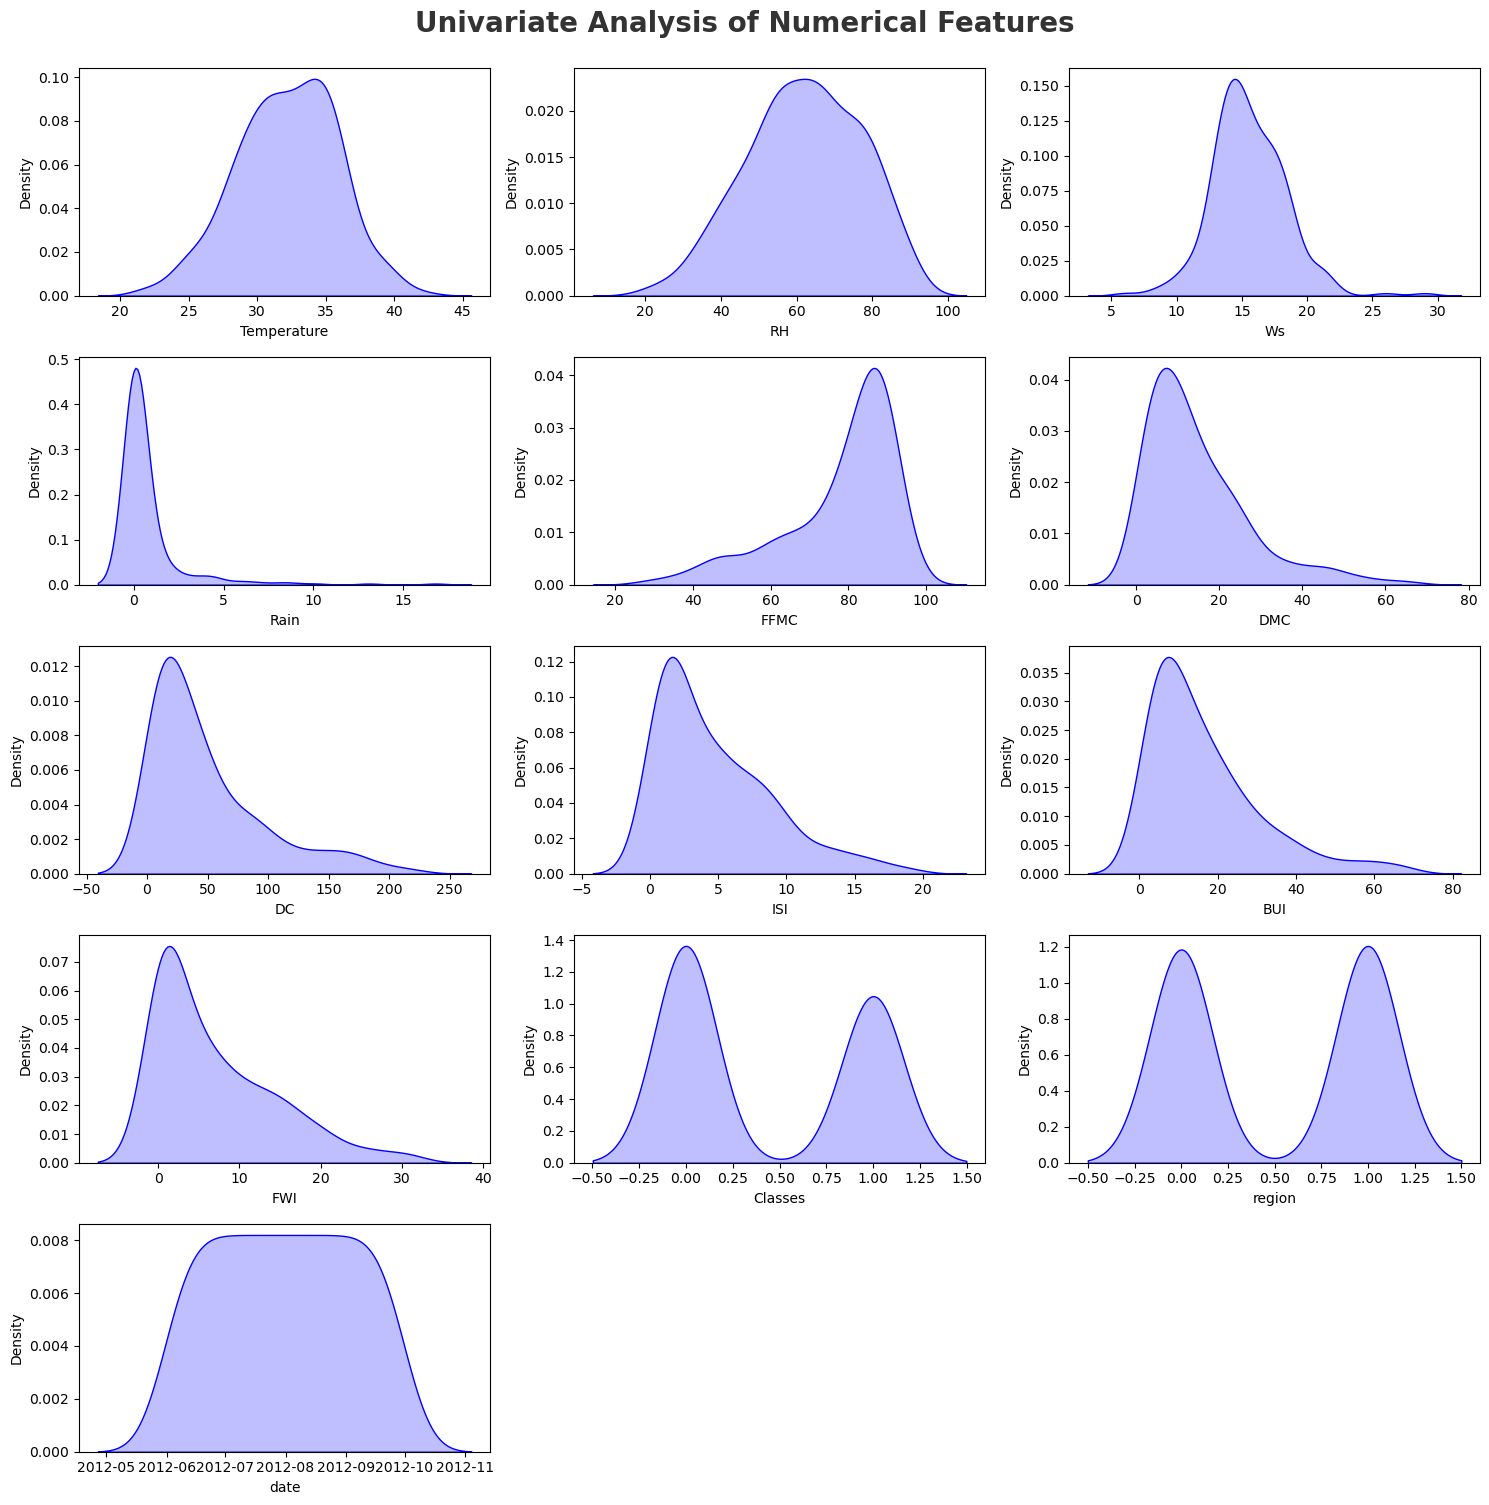

In [23]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_features[i]], shade=True ,color='b')
    plt.xlabel(num_features[i])
    plt.tight_layout()

<AxesSubplot:>

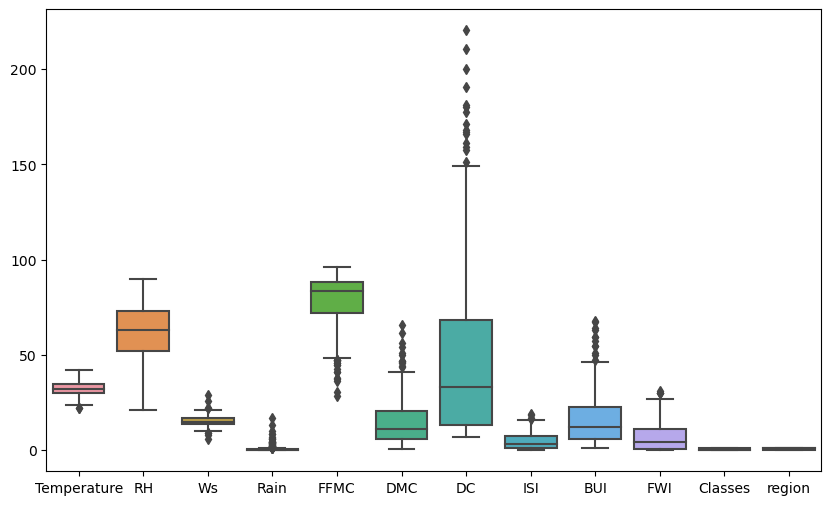

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, orient="v")

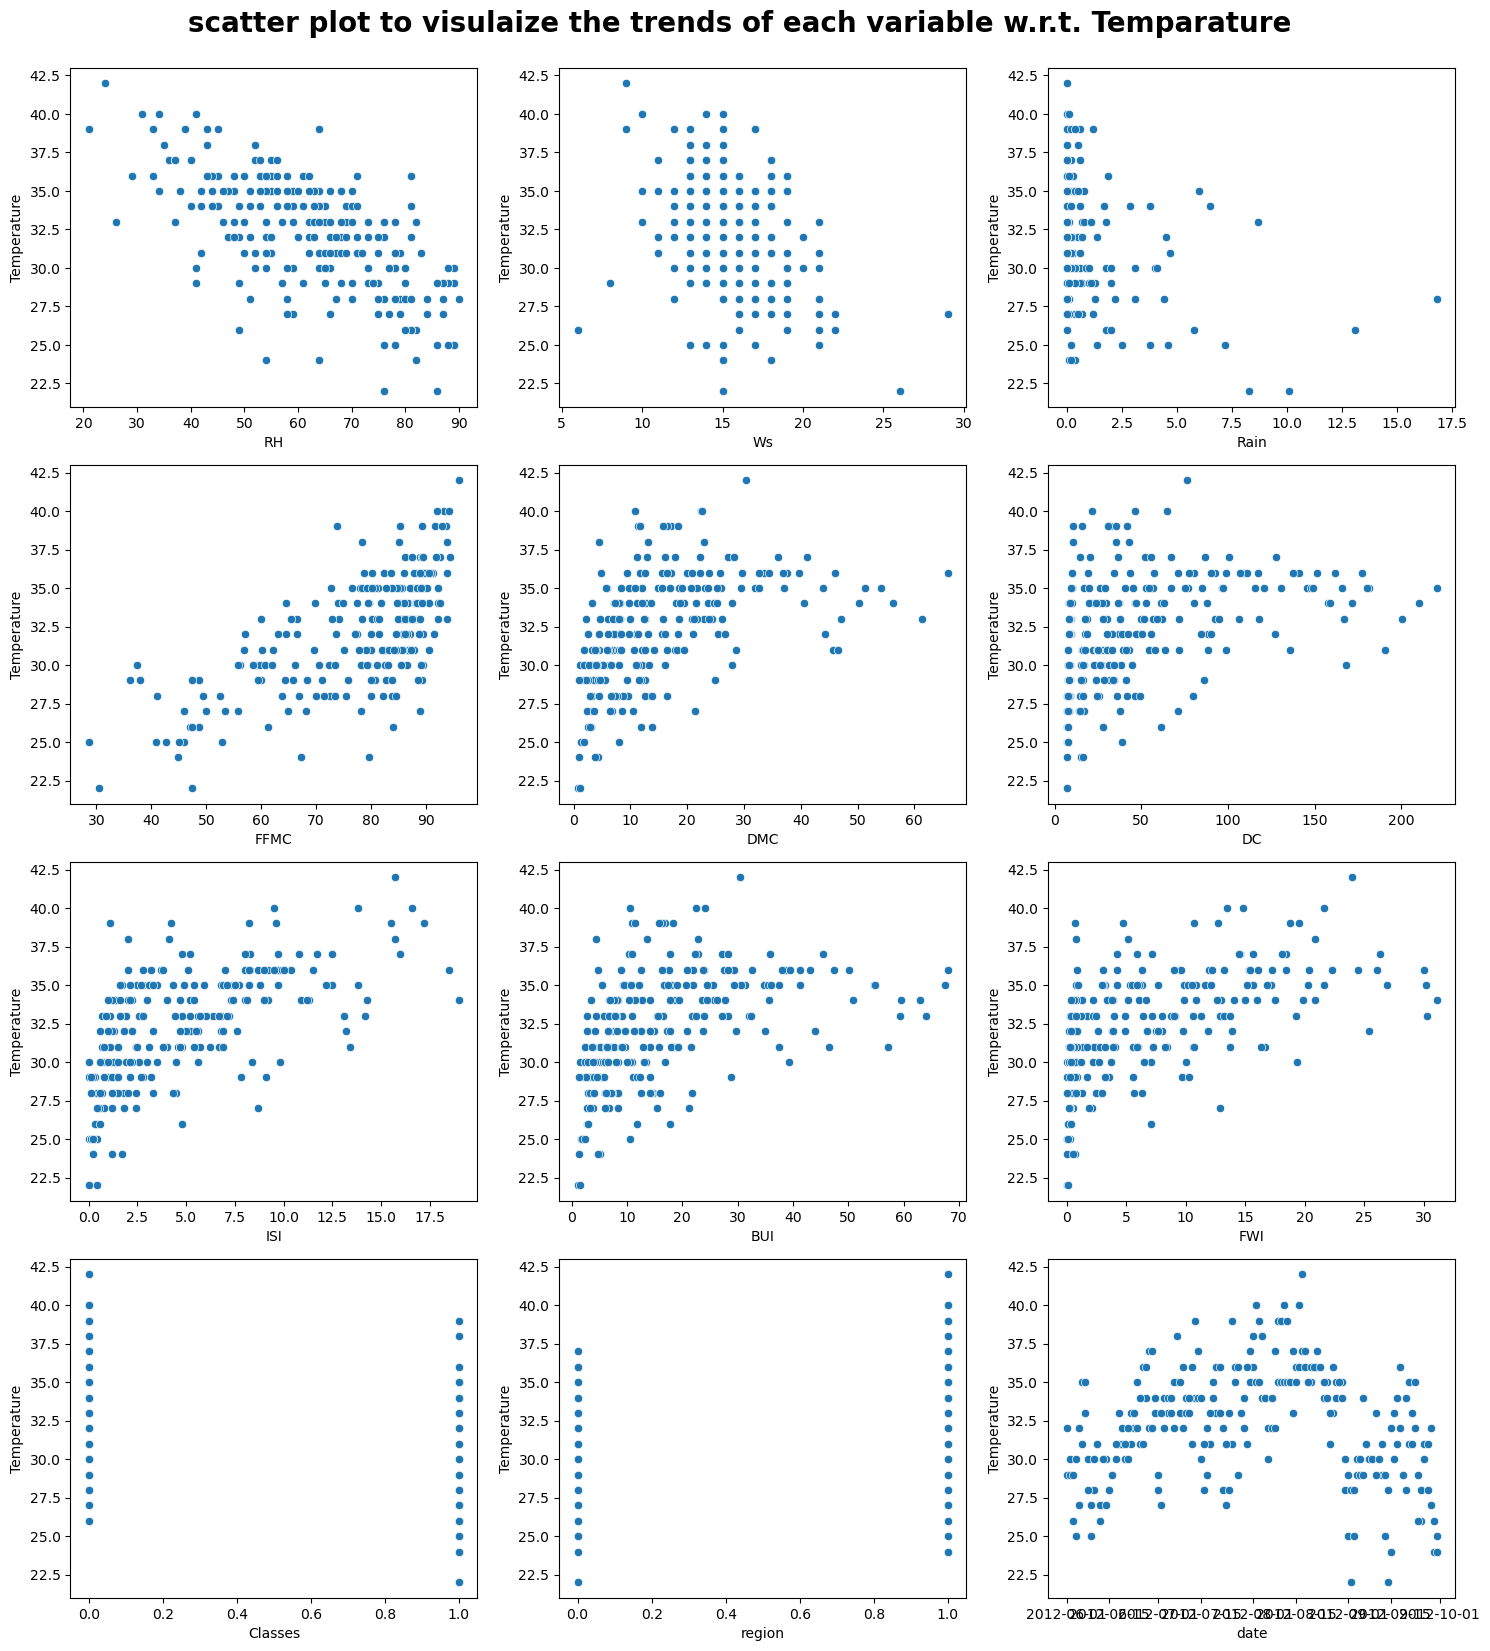

In [25]:
plt.figure(figsize=(15, 20))
plt.suptitle('scatter plot to visulaize the trends of each variable w.r.t. Temparature ', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(1, len(num_features)):
    plt.subplot(5, 3 , i)
    sns.scatterplot(x=num_features[i], y='Temperature', data=df)
    plt.tight_layout()

In [26]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.562344,-0.518119,0.257294
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.574773,0.435023,-0.397574
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.030910,0.066529,-0.181231
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.323831,0.379449,-0.038455
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.688876,-0.770114,0.205846
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.875791,-0.584188,0.182617
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.739633,-0.507122,-0.088700
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.913163,-0.735511,0.259431
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.858065,-0.583882,0.079124
FWI,0.562344,-0.574773,0.030910,-0.323831,0.688876,0.875791,0.739633,0.913163,0.858065,1.000000,-0.716490,0.187420


<AxesSubplot:title={'center':'corelation plot'}>

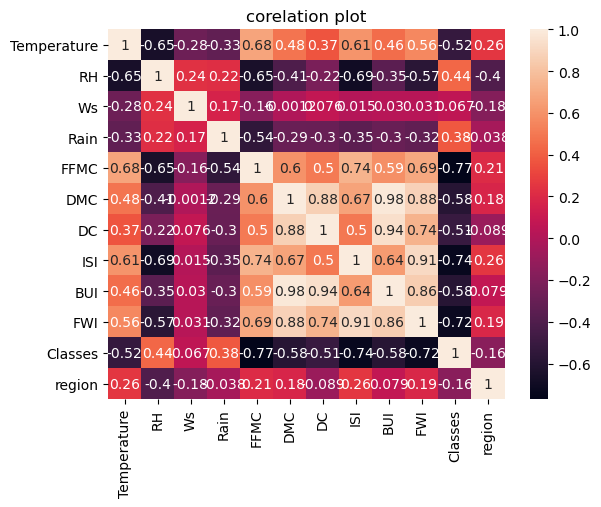

In [27]:

plt.title('corelation plot')
sns.heatmap(df.corr(), annot=True)


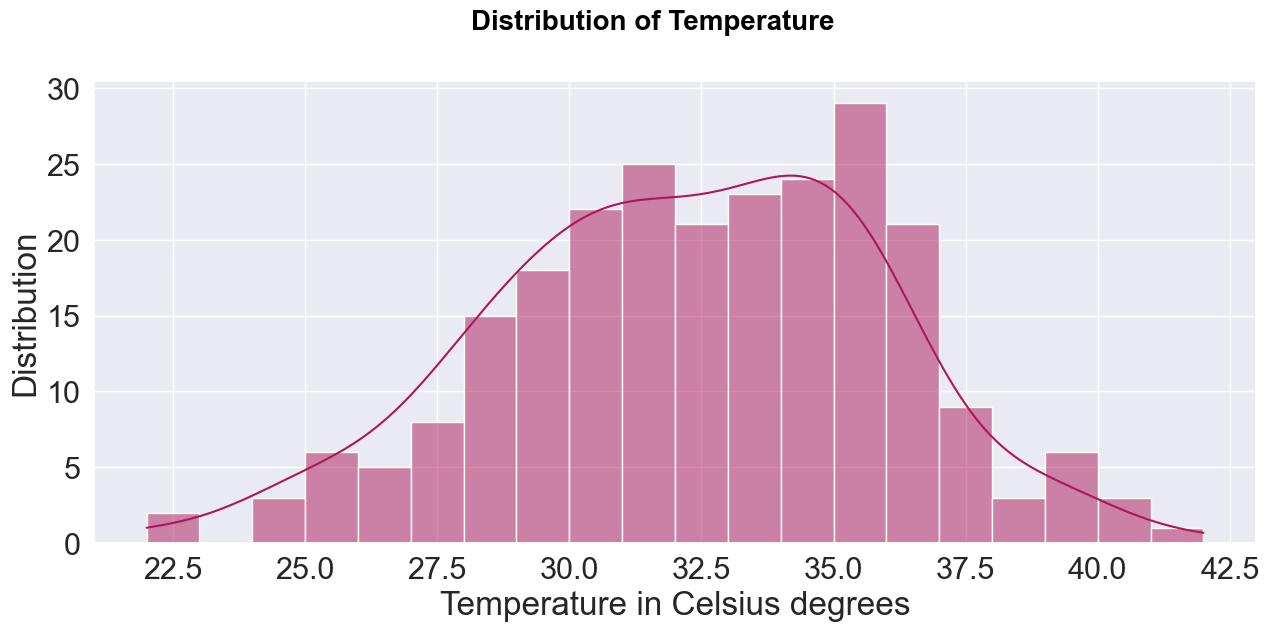

In [28]:
plt.figure(figsize=(15,6))
plt.suptitle('Distribution of Temperature ', fontsize=20, fontweight='bold', alpha=1, y=1)
sns.set(font_scale=2)
plt.xlabel('Temperature in Celsius degrees')
plt.ylabel('Distribution')
sns.histplot(df['Temperature'], bins=20, kde=True, color='#AD1759')
plt.show()

<AxesSubplot:xlabel='Temperature', ylabel='FFMC'>

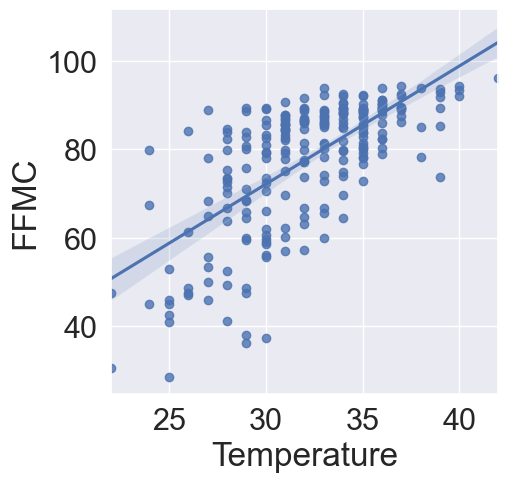

In [29]:
plt.figure(figsize=(5,5))
sns.regplot(x='Temperature',y='FFMC',data=df)

<AxesSubplot:xlabel='Temperature', ylabel='ISI'>

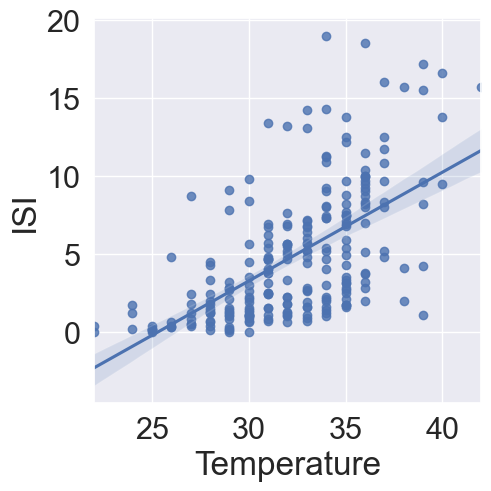

In [30]:
plt.figure(figsize=(5,5))
sns.regplot(x='Temperature',y='ISI',data=df)

In [28]:
# statistical description 
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.00000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.774180,16.664754,7.02377,0.434426,0.504098
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.175318,14.204824,7.42746,0.496700,0.501011
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.00000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.70000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.20000,0.000000,1.000000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.37500,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.10000,1.000000,1.000000


In [29]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1,2012-09-26
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1,2012-09-27
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1,2012-09-28
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1,2012-09-29


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    int32         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      244 non-null    int32         
 11  region       244 non-null    int32         
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(5)
memory usage: 20.1 KB


In [64]:
# defining dependent and independent features
X=df.iloc[:,1:-1]
y=df.iloc[:,0]

In [65]:
X

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
239,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
240,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
241,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
242,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


In [66]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int32

In [67]:
# splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [68]:
X_train.shape

(163, 11)

In [69]:
y_train.shape

(163,)

In [70]:
X_test.shape

(81, 11)

In [71]:
y_test.shape

(81,)

In [72]:
## Standardize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [73]:
scaler

StandardScaler()

In [74]:
X_train=scaler.fit_transform(X_train)

In [75]:
X_train

array([[-0.85631108, -3.36419461,  0.88853946, ..., -0.86115911,
         1.06992376,  0.98176139],
       [-0.52508491,  0.99944243, -0.441414  , ...,  1.21906769,
        -0.93464604, -1.01857744],
       [ 0.13736742,  0.99944243, -0.441414  , ...,  0.49032582,
        -0.93464604, -1.01857744],
       ...,
       [-0.72382061, -0.81873967, -0.441414  , ...,  0.384327  ,
        -0.93464604,  0.98176139],
       [ 0.13736742, -0.45510325, -0.441414  , ..., -0.78165999,
         1.06992376,  0.98176139],
       [ 1.13104591, -1.18237609, -0.441414  , ..., -0.79490985,
         1.06992376, -1.01857744]])

In [76]:
X_test=scaler.transform(X_test)

In [77]:
X_test

array([[-3.92594448e-01, -9.14668296e-02,  1.48701853e+00,
        -1.82411230e-01, -6.02677495e-01, -8.21325921e-01,
        -7.33442383e-01, -6.82030988e-01, -8.08159699e-01,
         1.06992376e+00,  9.81761387e-01],
       [ 1.37367416e-01,  6.35806011e-01, -4.41414004e-01,
         6.64566895e-01,  1.37979749e+00,  2.03374779e+00,
         4.94418103e-01,  1.72378441e+00,  1.16606828e+00,
        -9.34646039e-01, -1.01857744e+00],
       [-1.12129201e+00, -4.55103250e-01, -4.41414004e-01,
         9.08075201e-02, -7.86536062e-01, -8.06652268e-01,
        -6.38991577e-01, -8.28897625e-01, -7.94909847e-01,
         1.06992376e+00, -1.01857744e+00],
       [ 7.11221826e-02, -4.55103250e-01, -2.41920984e-01,
        -5.94627923e-02, -7.14591405e-01, -8.10844740e-01,
        -7.09829682e-01, -7.72948430e-01, -8.08159699e-01,
         1.06992376e+00, -1.01857744e+00],
       [-1.93858749e-01,  6.35806011e-01, -4.41414004e-01,
         6.78227832e-01,  1.28490116e-02,  1.74386276e-01,
  

## Linear Regression Model Prediction

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
regression=LinearRegression()

In [80]:
regression.fit(X_train,y_train)

LinearRegression()

### Printing the coefficients and intercepts

In [81]:
print(regression.coef_)

[-1.2314142  -0.53156279 -0.25507391  0.88632456 -0.04190662  0.86370742
  0.33163087 -0.30645077 -0.26474322 -0.16457001  0.25939068]


In [82]:
print(regression.intercept_)

32.17791411042945


In [116]:
## PRediction for the test data
pred=regression.predict(X_test)
pred

array([31.74319051, 33.28774848, 33.14219972, 31.44600423, 32.8697243 ,
       34.69995233, 33.75177235, 34.54613114, 31.9542695 , 32.87272785,
       33.74867833, 27.62143267, 35.45385626, 29.52192808, 32.04393945,
       32.14423266, 34.30616927, 28.58259585, 36.03015539, 34.28989668,
       32.71216608, 34.50988759, 33.49371411, 33.00232405, 35.92367126,
       29.04027747, 32.52692316, 32.687893  , 27.58667636, 32.26989326,
       25.94029408, 27.38416565, 33.84142038, 31.96005338, 32.88126301,
       30.82941536, 28.91586153, 32.83959417, 27.73236273, 35.32849919,
       32.64549584, 34.08133929, 33.97305984, 31.6373845 , 36.48875829,
       33.92883858, 24.28624182, 35.11135939, 33.8862469 , 29.45160542,
       31.21780796, 32.38773063, 35.62921039, 32.10212039, 30.26311029,
       30.16195346, 32.9813475 , 36.02089823, 31.39736625, 33.75029304,
       32.40328005, 32.75489474, 30.84965752, 24.32581071, 31.39065298,
       36.304391  , 29.66842658, 29.97324422, 34.98036142, 33.77

## Assumptions Of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

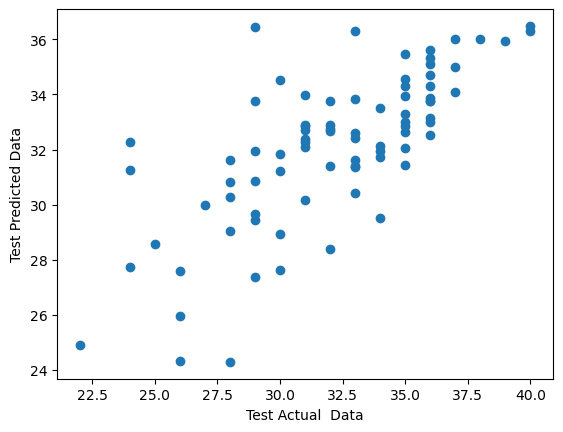

In [117]:
#relation between actual and predicted data
plt.scatter(y_test,pred)
plt.xlabel("Test Actual  Data")
plt.ylabel("Test Predicted Data")

In [118]:
## calculating residuals
residuals=y_test-pred
residuals

162    2.256809
60     1.712252
61     2.857800
63     3.553996
69     2.130276
         ...   
169    0.399601
232   -7.445171
144    1.394205
208   -3.288466
105   -2.908695
Name: Temperature, Length: 81, dtype: float64

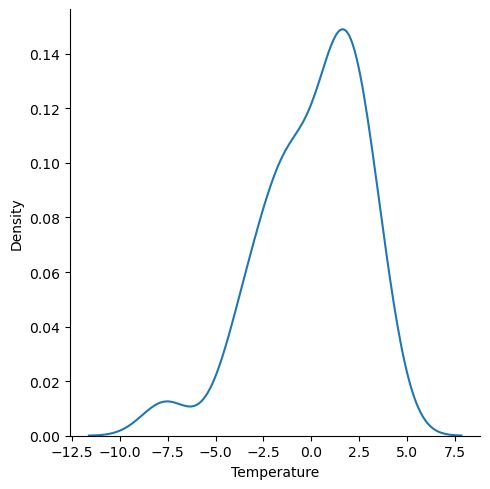

In [119]:
# checking the distribution of residuals 
sns.displot(residuals, kind="kde")

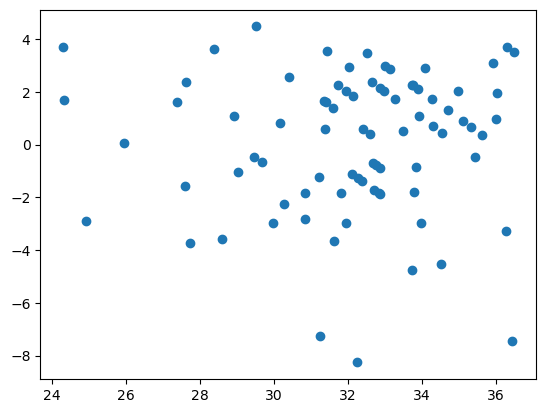

In [120]:
# SCatter plot with predictions and residual
# uniform distribution
plt.scatter(pred,residuals)

### Performance Metrics

In [121]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

7.180578753398472
2.191883762472748
2.6796601936436777


### R square and adjusted R square

In [122]:
## R square
from sklearn.metrics import r2_score
score=r2_score(y_test,pred)
print(score)

0.5251690499602151


In [123]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4494713622727131

## Ridge Regression Model Prediction

In [125]:
## Ridge regression
from sklearn.linear_model import Ridge
ridge=Ridge()

In [126]:
ridge.fit(X_train,y_train)

Ridge()

### Printing the coefficients and intercepts for ridge 

In [127]:
print(ridge.coef_)

[-1.22281043 -0.53061334 -0.2581778   0.88249323 -0.13549697  0.7634265
  0.31001667 -0.12715391 -0.23277322 -0.16220464  0.25621711]


In [128]:
print(ridge.intercept_)

32.17791411042945


In [129]:
## PRediction for the test data
ridge_pred = ridge.predict(X_test)

### Assumptions Of Ridge Regression

Text(0, 0.5, 'Test Predicted Data')

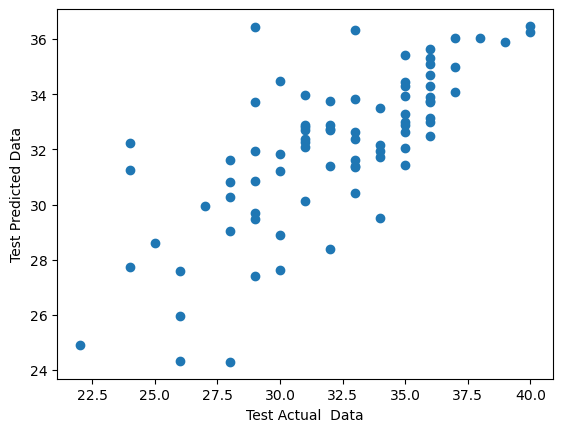

In [130]:
#relation between actual and predicted data
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Actual  Data")
plt.ylabel("Test Predicted Data")

In [131]:
## calculating residuals
residuals=y_test-ridge_pred
residuals

162    2.258278
60     1.708040
61     2.866811
63     3.547965
69     2.131822
         ...   
169    0.378922
232   -7.429250
144    1.387110
208   -3.319726
105   -2.912896
Name: Temperature, Length: 81, dtype: float64

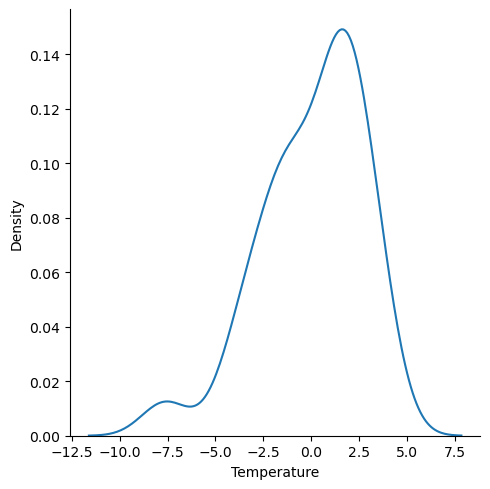

In [132]:
# checking the distribution of residuals 
sns.displot(residuals, kind="kde")

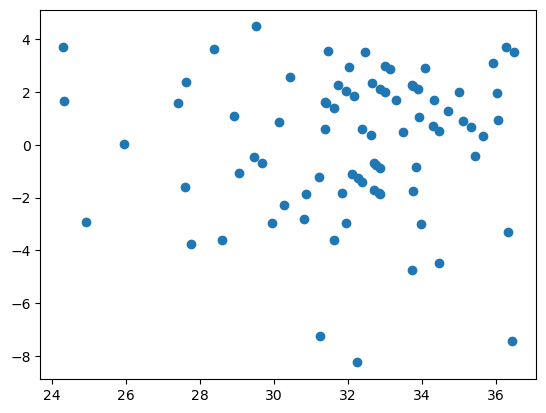

In [133]:
# SCatter plot with predictions and residual
# uniform distribution
plt.scatter(ridge_pred,residuals)

### Performance Metrics

In [134]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

7.174740759796713
2.1916207245409782
2.6785706561143225


### R square and adjusted R square

In [135]:
## R square
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_pred)
print(score)

0.525555099628835


In [136]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.44991895609140276

## Lasso Regression Model Prediction

In [149]:
## Lasso regression
from sklearn.linear_model import Lasso
lasso=Lasso()

In [138]:
lasso.fit(X_train,y_train)

Lasso()

### Printing the coefficients and intercepts for lasso

In [139]:
print(lasso.coef_)

[-0.71955751 -0.         -0.          0.89582004  0.          0.
  0.          0.          0.         -0.          0.        ]


In [140]:
print(lasso.intercept_)

32.17791411042945


In [141]:
## PRediction for the test data
lasso_pred = lasso.predict(X_test)

### Assumptions Of Lasso Regression

Text(0, 0.5, 'Test Predicted Data')

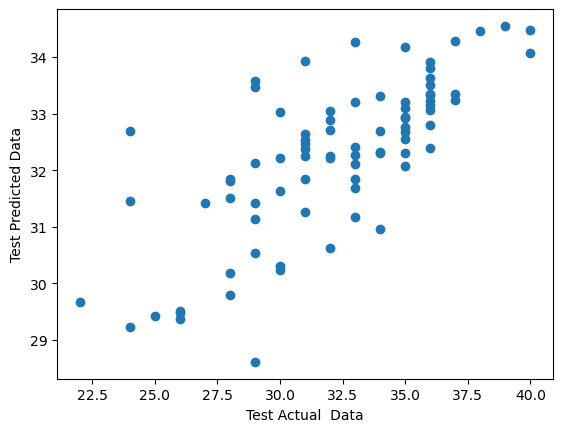

In [142]:
#relation between actual and predicted data
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Actual  Data")
plt.ylabel("Test Predicted Data")

In [143]:
## calculating residuals
residuals=y_test-lasso_pred
residuals

162    1.702999
60     2.325597
61     2.933905
63     2.926530
69     2.075023
         ...   
169    0.583574
232   -4.568827
144    0.882714
208   -1.267362
105   -7.667085
Name: Temperature, Length: 81, dtype: float64

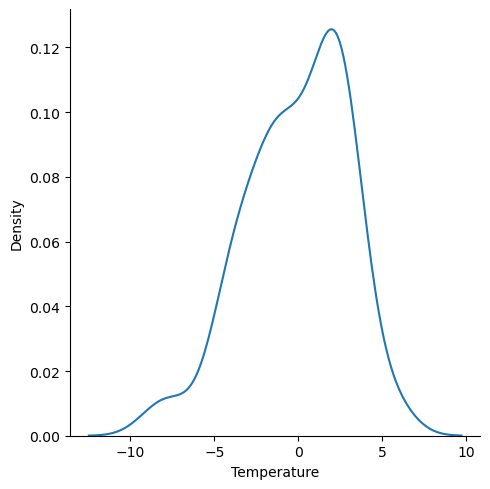

In [144]:
# checking the distribution of residuals 
sns.displot(residuals, kind="kde")

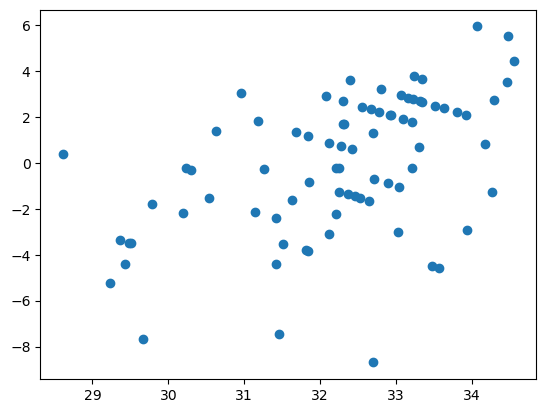

In [145]:
# SCatter plot with predictions and residual
# uniform distribution
plt.scatter(lasso_pred,residuals)

### Performance Metrics

In [146]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

9.10609532182792
2.4978660766652734
3.0176307464346794


### R square and adjusted R square

In [147]:
## R square
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_pred)
print(score)

0.525555099628835


In [148]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.44991895609140276

## Elastic Net Regression Model Prediction

In [151]:
## Elastic net regression
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

In [153]:
elastic.fit(X_train,y_train)

ElasticNet()

### Printing the coefficients and intercepts for ElasticNet

In [154]:
print(elastic.coef_)

[-0.68518607 -0.10795488 -0.01340552  0.67055076  0.07448995  0.
  0.21938604  0.039852    0.12148025 -0.10852897  0.        ]


In [155]:
print(elastic.intercept_)

32.17791411042945


In [156]:
## PRediction for the test data
elastic_pred = elastic.predict(X_test)

### Assumptions Of ElasticNet Regression

Text(0, 0.5, 'Test Predicted Data')

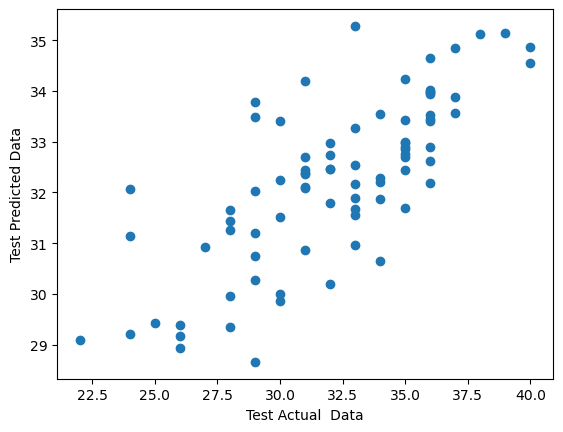

In [157]:
#relation between actual and predicted data
plt.scatter(y_test,elastic_pred)
plt.xlabel("Test Actual  Data")
plt.ylabel("Test Predicted Data")

In [160]:
## calculating residuals
residuals=y_test-elastic_pred
residuals

162    2.132735
60     2.010267
61     3.382345
63     3.312370
69     2.029095
         ...   
169    0.448670
232   -4.784055
144    1.317798
208   -2.283508
105   -7.100882
Name: Temperature, Length: 81, dtype: float64

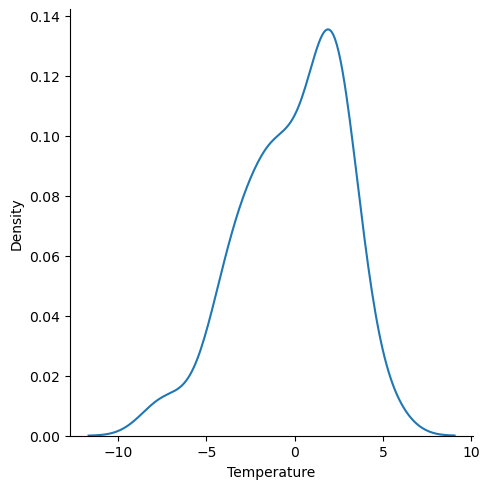

In [161]:
# checking the distribution of residuals 
sns.displot(residuals, kind="kde")

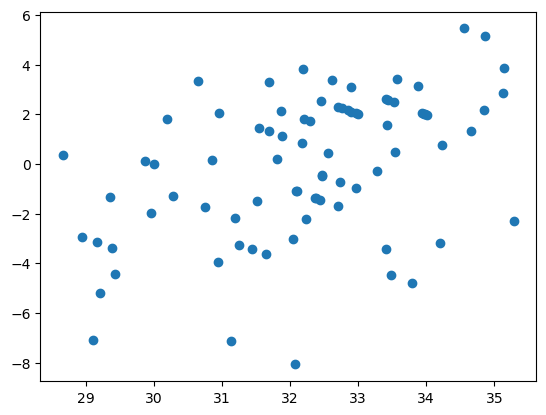

In [163]:
# SCatter plot with predictions and residual
# uniform distribution
plt.scatter(elastic_pred,residuals)

### Performance Metrics

In [164]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elastic_pred))
print(mean_absolute_error(y_test,elastic_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_pred)))

8.291676422644947
2.3933501980514316
2.879527117886711


### R square and adjusted R square

In [165]:
## R square
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_pred)
print(score)

0.525555099628835


In [166]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.44991895609140276